In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
#데이터 가져오기
(x_train_data, t_train_data), (x_test_data, t_test_data)=mnist.load_data()

In [3]:
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(t_train_data[0])

5


<function matplotlib.pyplot.show(close=None, block=None)>

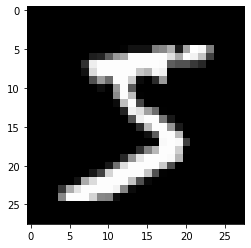

In [5]:
import matplotlib.pyplot as plt
#이미지 확인 (데이터를 이미지로 나타내기 컬러는 정할 수는 없음)
img=x_train_data[0]
plt.imshow(img,cmap='gray')
plt.show

In [6]:
#데이터 확인
print(x_train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<function matplotlib.pyplot.show(close=None, block=None)>

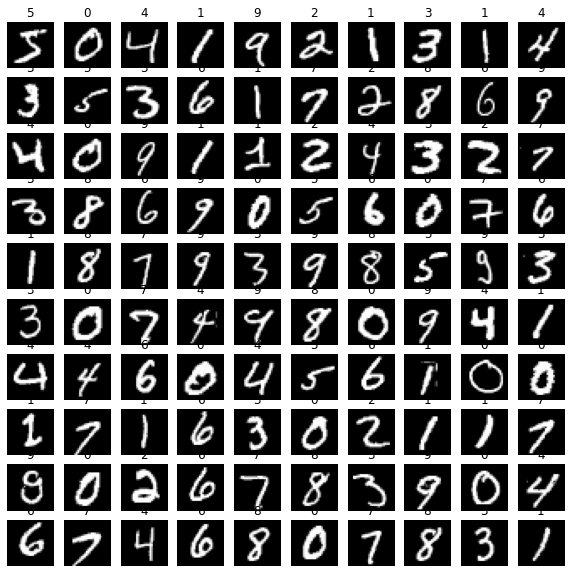

In [7]:
plt.figure(figsize=(10,10)) #10인치 
for index in range(0,100,1):
    plt.subplot(10,10,index+1)
    plt.imshow(x_train_data[index],cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show

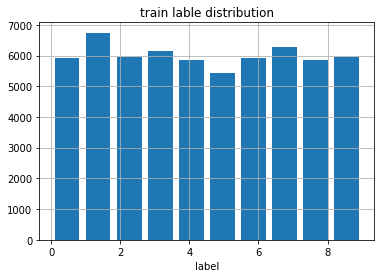

In [8]:
plt.title('train lable distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data,bins=10,rwidth=0.8)
plt.show()

In [9]:
label_list=np.zeros(10)
print(label_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
for idx in range(len(t_train_data)):
    label=int(t_train_data[idx])
    label_list[label]+=1
print(label_list)
#0 1 2 3 4 5 6 7 8 9 (5가 좀 작게 있다?)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [11]:
# 값이 1에서 0 사이의 값으로 바뀜 (오버플로? 일어나니깐 작은 수치로 바꿔주었다.)
# x 데이터 두개를 이용해서 처리해야하는 게 맞다.
x_train=(x_train_data-0.0)/(255.0-0.0)
x_test=(x_test_data-0.0)/(255.0-0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
t_train_data[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
#(One_Hot encoding): 여러개 중 하나만 핫하게 만든다?
t_train=tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test=tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [14]:
print(t_train[0]) #5
print(t_test[0]) #7

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
#모델 만들기
model=Sequential()
#28,28을 일차원으로 펼칠 것이다.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# 컴파일 됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
# # 훈련 데이터가 충분히 많아서 벨리테이션 데이터 로 하겠다.
# # 훈련이 오버피팅 되면 
# # 훈련데이터에 맞춰져버려서 정확도가 오히려 떨어지고 새로운 데이터를 분류하지 못하게 된다.
# hist=model.fit(x_train, t_train, epochs=100, validation_split=0.3)

In [18]:
hist=model.fit(x_train, t_train, epochs=50, validation_split=0.3)
#val_loss 손실함수
#높긴한데 충분하게 훈련이 되었다. 정확도 val_accuracy: 0.9714

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7697 - accuracy: 0.8100 - val_loss: 0.3858 - val_accuracy: 0.9004
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3427 - accuracy: 0.9081 - val_loss: 0.3019 - val_accuracy: 0.9168
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.9219 - val_loss: 0.2653 - val_accuracy: 0.9264
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2474 - accuracy: 0.9315 - val_loss: 0.2397 - val_accuracy: 0.9340
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2227 - accuracy: 0.9380 - val_loss: 0.2216 - val_accuracy: 0.9370
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2031 - accuracy: 0.9431 - val_loss: 0.2078 - val_accuracy: 0.9414
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1863 - accuracy: 0.9480 - val_loss: 0.1953 - val_accuracy:

In [19]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 801us/step - loss: 0.0843 - accuracy: 0.9755


[0.08431097865104675, 0.9754999876022339]

In [20]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 704us/step


In [21]:
print(predictions[0])
print(t_test[0])

[4.7170461e-06 3.9237383e-07 2.3313447e-04 1.6875165e-02 1.8893120e-09
 1.2940568e-06 8.1151079e-11 9.8258507e-01 6.6627646e-05 2.3354727e-04]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [32]:
label=np.argmax(predictions[0])
print(label)

7


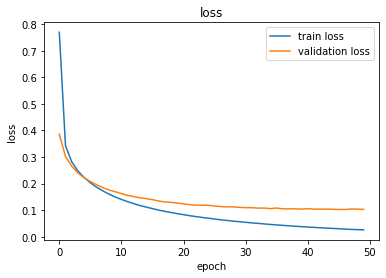

In [23]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

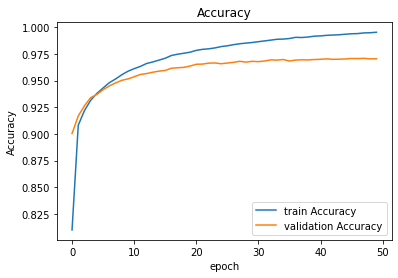

In [25]:
# loss대신 정확도
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
plt.figure(figsize=(6,6))
# t_test,prediction에 있는 값으로 그래프를 그릴 것임
cm=confusion_matrix(np.argmax(t_test, axis=-1),
                   np.argmax(predictions,axis=-1))
print(cm)

[[ 971    0    0    1    1    0    3    1    2    1]
 [   0 1124    3    1    0    1    3    0    3    0]
 [   3    1 1008    3    2    0    2    7    6    0]
 [   0    0    0  991    0    3    0    5    8    3]
 [   0    0    4    1  955    1    3    2    2   14]
 [   2    0    0    7    1  864    7    2    5    4]
 [   7    3    1    1    3    5  934    0    4    0]
 [   0    5   12    5    2    0    0  995    1    8]
 [   7    0    3    7    5    6    1    5  935    5]
 [   2    3    0    4    8    5    0    7    2  978]]


<Figure size 432x432 with 0 Axes>

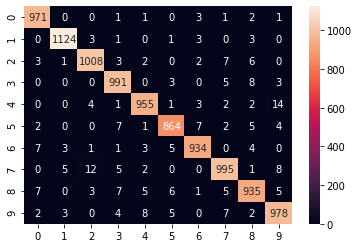

In [31]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()